In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
gender_submission = pd.read_csv('/data/gender_submission.csv')
test = pd.read_csv('/data/test.csv')
train = pd.read_csv('/data/train.csv')

In [40]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
drop = ['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
train = train.drop(drop, axis=1)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [42]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [43]:
train.groupby('Survived').mean()
#видно, что например, у людей которые выжили(Survived=1) класс выше к богатому(Pclass=1),
#чем к бедному(Pclass=3), также такие люди в среднем моложе и стоимость их проезда выше

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


In [44]:
train.groupby(train['Age'].isnull()).mean()
#проверяем отсутствующие значения в 'Age'
#как видим, люди с отсутствующим возрастом путешевствовали более низшим классом
#(Pclass более к третьему) и билет их стоил ниже (Parch),
#также у таких людей было меньше шансов на выживание

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


<ipython-input-45-3b2b3ab626a4>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width))
<ipython-input-45-3b2b3ab626a4>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(survived, color='g', kde=False, bins=np.arange(xmin, xmax, width))


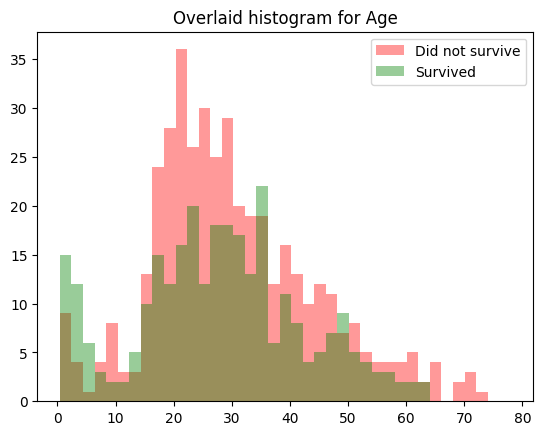

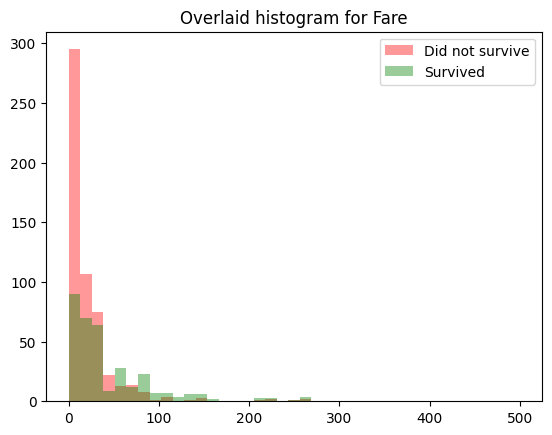

In [45]:
for i in ['Age', 'Fare']:
  died = list(train[train['Survived'] == 0][i].dropna())
  survived = list(train[train['Survived'] == 1][i].dropna())
  xmin = min(min(died), min(survived))
  xmax = max(max(died), max(survived))
  width = (xmax - xmin) / 40
  sns.distplot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width))
  sns.distplot(survived, color='g', kde=False, bins=np.arange(xmin, xmax, width))
  plt.legend(['Did not survive', 'Survived'])
  plt.title('Overlaid histogram for {}'.format(i))
  plt.show()

<Figure size 640x480 with 0 Axes>

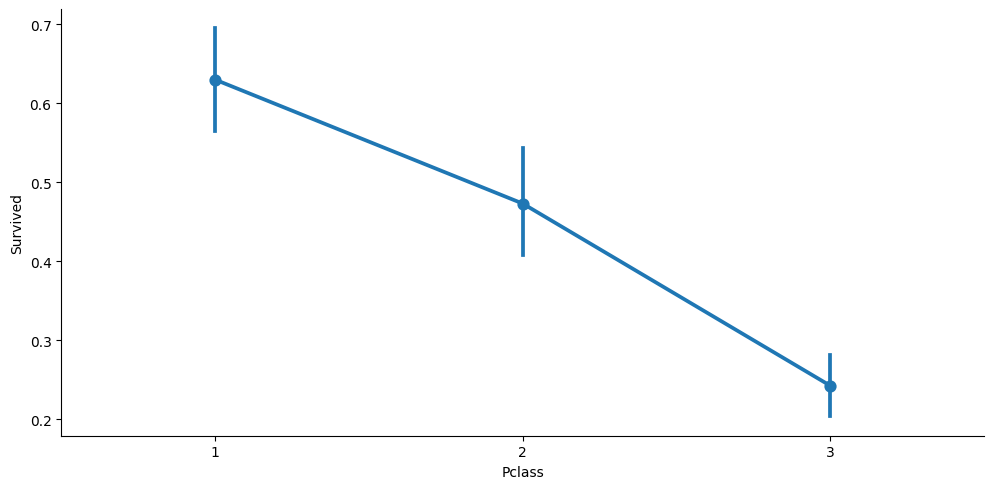

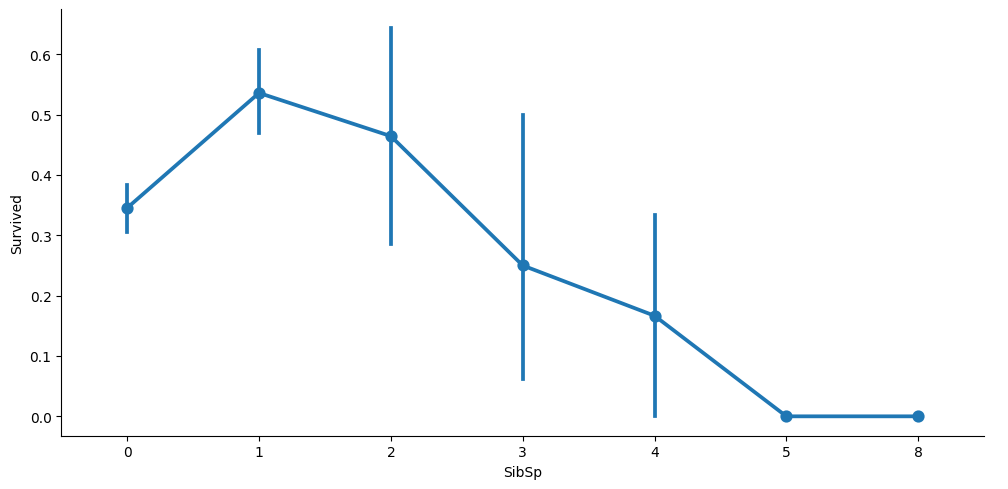

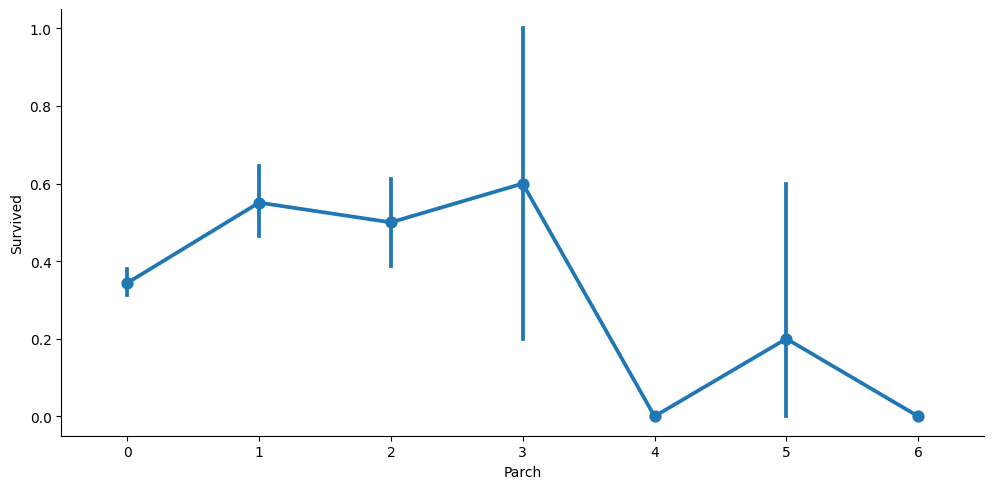

In [46]:
for i, col in enumerate(['Pclass', 'SibSp', 'Parch']):
  plt.figure(i)
  sns.catplot(x=col, y='Survived', data=train, kind='point', aspect=2,)

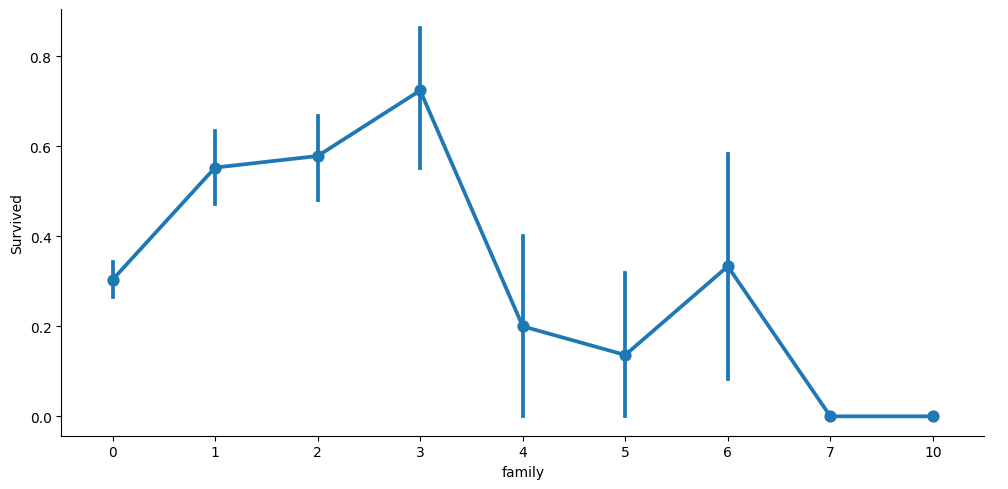

In [47]:
train['family'] = train['SibSp'] + train['Parch']
sns.catplot(x='family', y='Survived', data=train, kind='point', aspect=2,)

In [48]:
train.isnull().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
family        0
dtype: int64

In [49]:
train['Age'].fillna(train['Age'].mean(), inplace=True)
train.isnull().sum() #заполняем пустые средним, хотя мб было бы лучше заполнить медианой

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
family      0
dtype: int64

In [50]:
train.drop(['SibSp', 'Parch'], axis=1, inplace=True)